# 02. Calcular la Clase Ambigüa

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

## Read data

In [93]:
base_path = '../data/processed/definitive-two-classes/'

data_real = pd.read_csv(base_path + 'real.csv', dtype = {'FAM_Sample_info_id': str, 'VIC_Sample_info_id': str})
data_train = pd.read_csv(base_path + 'train.csv', dtype = {'FAM_Sample_info_id': str, 'VIC_Sample_info_id': str})
data_test = pd.read_csv(base_path + 'test.csv', dtype = {'FAM_Sample_info_id': str, 'VIC_Sample_info_id': str})

db = pd.concat([data_train, data_test], ignore_index = True)

In [94]:
db

,Shared_Markers,k0,k1,k2,Share_allele,Value,True_positive,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel,ValueLog10
0,15,0,11,4,19,100.000,0,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-1,1:749,100-999,083202,S,066302,F,2.000000
1,15,0,5,10,25,694.085,0,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100-999,030702,F,098602,S,2.841413
2,15,0,4,11,26,12041.600,1,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-375,375:375,10000-99999,133801,S,133801,F,4.080684
3,15,0,9,6,21,11098.100,1,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-175,175:575,10000-99999,028901,S,028901,F,4.045249
4,15,0,9,6,21,800.000,0,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-175,175:575,100-999,132702,S,142701,F,2.903090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,13,2,7,6,19,3.000,0,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-375,375:375,0-99,093001,F,027102,F,0.477121
1886,15,0,12,3,18,16362.800,1,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-175,175:575,10000-99999,092201,S,092201,F,4.213858
1887,15,0,5,10,25,100000.000,1,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-97,97:653,100000-999999,082701,S,082701,F,5.000000
1888,15,0,5,10,25,1000.000,0,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-175,175:575,1000-9999,098602,S,030702,F,3.000000


## Calcular Clase Ambigüa

In [95]:
scaler = MinMaxScaler()

varsToScale = ['k1', 'k2', 'ValueLog10']
newVarNames = [name + '_scaled' for name in varsToScale]

db[newVarNames] = scaler.fit_transform(db[varsToScale])

In [96]:
fig = px.scatter_3d(db,
                    x = 'k1_scaled',
                    y = 'k2_scaled',
                    z = 'ValueLog10_scaled',
                    color = 'True_positive')
fig.update_traces(marker_size = 5)
fig.show()

## Calcular Tercera Clase

In [97]:
epsilon = 0.5
space_cols = ['k1', 'k2', 'ValueLog10']
new_db = db.copy()

In [98]:
for index1, point_A in db.iterrows():
    current_label = point_A["True_positive"]
    
    db_aux = db.copy()
    db_aux = db_aux.iloc[(index1 + 1):][:]
    db_aux = db_aux[db_aux.True_positive == ((current_label + 1) % 2)]

    for index2, point_B in db_aux.iterrows():
        distance = np.linalg.norm(point_A[space_cols].values - point_B[space_cols].values)
        if distance <= epsilon:
            # print("Ambigüo")
            new_db.at[index1, 'True_positive'] = 0.5
            new_db.at[index2, 'True_positive'] = 0.5

In [99]:
new_db.head(5)

,Shared_Markers,k0,k1,k2,Share_allele,Value,True_positive,Marcadores,Software,Datos,...,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel,ValueLog10,k1_scaled,k2_scaled,ValueLog10_scaled
0,15,0,11,4,19,100.000,0.5,15,ScreenMatch,Simulados,...,1:749,100-999,083202,S,066302,F,2.000000,0.833333,0.250000,0.215781
1,15,0,5,10,25,694.085,0.0,15,BlindSeach,Simulados,...,1:749,100-999,030702,F,098602,S,2.841413,0.333333,0.750000,0.306561
2,15,0,4,11,26,12041.600,0.5,15,BlindSeach,Simulados,...,375:375,10000-99999,133801,S,133801,F,4.080684,0.250000,0.833333,0.440266
3,15,0,9,6,21,11098.100,0.5,15,BlindSeach,Simulados,...,175:575,10000-99999,028901,S,028901,F,4.045249,0.666667,0.416667,0.436443
4,15,0,9,6,21,800.000,0.5,15,ScreenMatch,Simulados,...,175:575,100-999,132702,S,142701,F,2.903090,0.666667,0.416667,0.313215


In [100]:
fig = px.scatter_3d(new_db,
                    x = 'k1_scaled',
                    y = 'k2_scaled',
                    z = 'ValueLog10_scaled',
                    color = 'True_positive')
fig.update_traces(marker_size = 5)
fig.show()

In [101]:
new_db["True_positive"] = new_db["True_positive"] * 2

## Asignar la Nueva Clase a las Particiones de Datos

### Guardar en los Dataframes

In [102]:
uniqueness_features = ["FAM_Sample_info_id", "FAM_Sample_info_rel", "VIC_Sample_info_id", "VIC_Sample_info_rel", "Software", "Datos"]
new_db = new_db[uniqueness_features + ["True_positive"]]

In [103]:
db_real = data_real.copy()
db_real['True_positive'] = db_real['True_positive'] * 2

db_train = data_train.drop(columns = 'True_positive').merge(new_db, how = 'left', on = uniqueness_features)
db_test = data_test.drop(columns = 'True_positive').merge(new_db, how = 'left', on = uniqueness_features)

<AxesSubplot: >

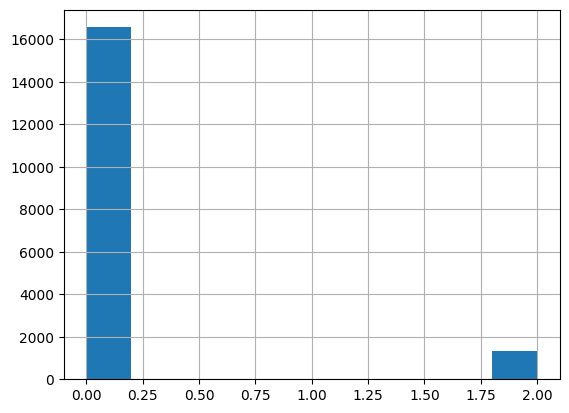

In [104]:
db_real["True_positive"].hist()

<AxesSubplot: >

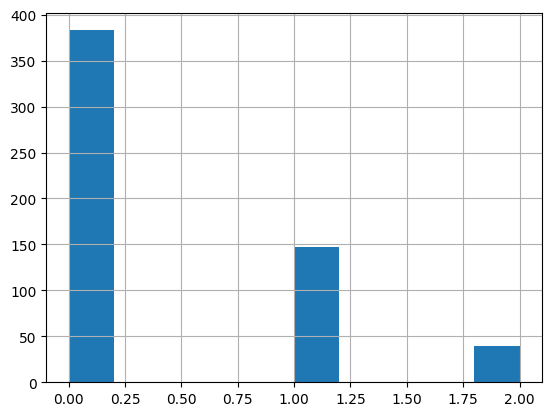

In [105]:
db_test["True_positive"].hist()

<AxesSubplot: >

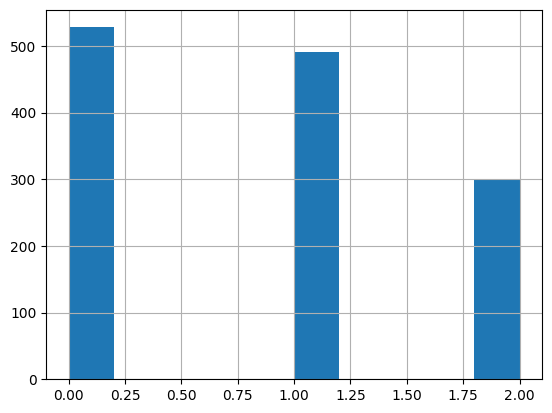

In [106]:
db_train["True_positive"].hist()

In [107]:
base_path = '../data/processed/definitive-three-classes/'

db_real.to_csv(base_path + 'real.csv', index = False)
db_train.to_csv(base_path + 'train.csv', index = False)
db_test.to_csv(base_path + 'test.csv', index = False)